# SVM (Support Vector Machine)

**하이퍼 파라미터**

<table>
  <thead>
    <tr>
      <th>파라미터 명</th>
      <th>설명</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><code>C</code></td>
      <td>
        학습 데이터의 오류 허용도를 결정<br>
        C 값이 크면 오류를 최소화하고, 결정 경계가 데이터에 더 민감해짐 (마진을 최대화하는 대신 오류를 허용하지 않으므로 과대적합 가능성)<br>
        C 값이 작으면 오류를 허용하면서 일반화에 더 집중 (마진을 최대화하려고 노력하면서 오류를 어느 정도 허용하나 과소적합 가능성)
      </td>
    </tr>
    <tr>
      <td><code>kernel</code></td>
      <td>
        비선형 데이터의 변환을 위한 커널 함수 설정
        <ul>
          <li><code>linear</code>: 선형 커널 (데이터가 선형적으로 분리 가능한 경우)</li>
          <li><code>poly</code>: 다항식 커널 (비선형 관계, 차수 degree로 지정)</li>
          <li><code>rbf</code>: RBF(Radial Basis Function)커널, 가우시안 커널로 비선형 데이터 처리</li>
          <li><code>sigmoid</code>: 시그모이드 커널</li>
        </ul>
      </td>
    </tr>
  </tbody>
</table>

## 분류 (SVC)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, random_state=42) 

In [3]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

### feature 2개만 뽑아서 시각화 해보기

In [4]:
df = pd.DataFrame(iris_data.data[:,:2], columns=iris_data.feature_names[:2])
df['target'] = iris_data.target
df

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [23]:
X = iris_data.data[:, :2]
y = iris_data.target

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

svm_clf = SVC(kernel='linear', C=1) # C값 줄인다는 것은 오류를 더 허용 -> 일반화에 초점
svm_clf.fit(X_train, y_train)
svm_clf.score(X_train, y_train), svm_clf.score(X_test, y_test)

(0.7946428571428571, 0.8421052631578947)

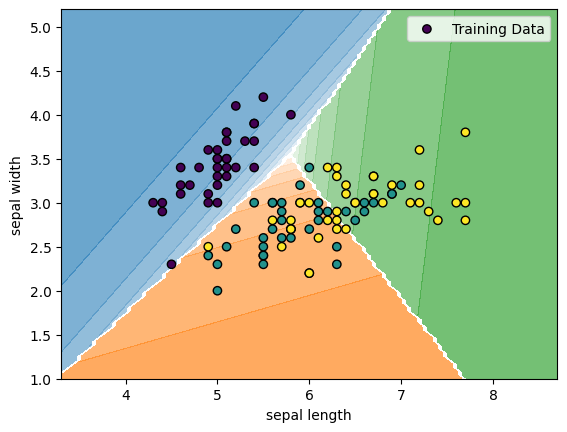

In [24]:
# SVM 시각화 (SVC)
from sklearn.inspection import DecisionBoundaryDisplay

dbd = DecisionBoundaryDisplay.from_estimator(svm_clf, X_train, alpha= 0.7)

plt.scatter(X_train[:,0], X_train[:,1], c=y_train, edgecolors='k', label='Training Data')
plt.xlabel("sepal length")
plt.ylabel('sepal width')
plt.legend()
plt.show()

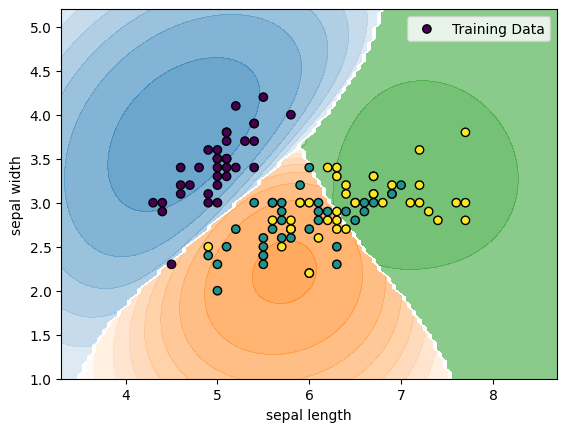

In [25]:
# 다른 kernel로 해보기
svm_clf = SVC(kernel='rbf', C=1.0, gamma=0.5)
svm_clf.fit(X_train,y_train)

dbd = DecisionBoundaryDisplay.from_estimator(svm_clf, X_train, alpha= 0.7)

plt.scatter(X_train[:,0], X_train[:,1], c=y_train, edgecolors='k', label='Training Data')
plt.xlabel("sepal length")
plt.ylabel('sepal width')
plt.legend()
plt.show()

## 회귀 (SVR)
- 분류는 margin값을 최대로 하는 hyperplane을 찾아야 하지만 
- 회귀에서는 epsilon tube 내에 최대한 많은 수의 데이터가 들어오는 것이 좋음. So, epsilon은 파라미터
    - 벗어나면 패널티/손실

In [28]:
np.random.seed(0)
X = np.sort(np.random.rand(40,1) * 5, axis=0) # 0부터 5 40개 생성 shape:(40,1)
y = np.sin(X).ravel() + np.random.randn(40) *0.1

X_test = np.linspace(0,5,100).reshape(-1,1) # shape: (100,1)

In [30]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf')
svr_lin = SVR(kernel='linear')
svr_poly = SVR(kernel='poly')

svr_rbf.fit(X,y)
svr_lin.fit(X,y)
svr_poly.fit(X,y)

pred_rbf = svr_rbf.predict(X_test)
pred_lin = svr_lin.predict(X_test)
pred_poly = svr_poly.predict(X_test)

0.1
0.1
0.1


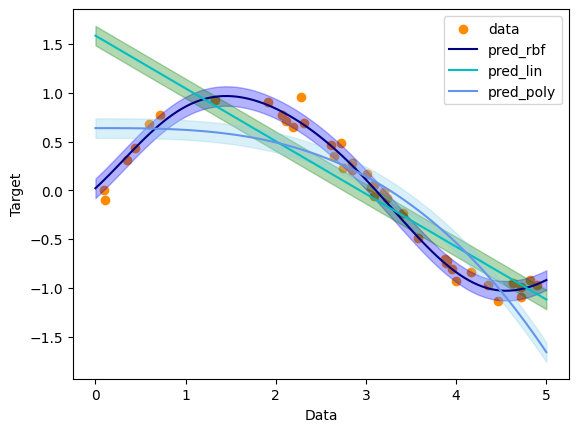

In [34]:
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X_test, pred_rbf, color='navy', label='pred_rbf')
plt.plot(X_test, pred_lin, color='c', label="pred_lin")
plt.plot(X_test, pred_poly, color='cornflowerblue', label='pred_poly')

# Epsilon Tube
svr_rbf_epsilon = svr_rbf.epsilon
print(svr_rbf_epsilon)
epsilon_upper = pred_rbf + svr_rbf_epsilon
epsilon_lower = pred_rbf - svr_rbf_epsilon
plt.fill_between(X_test.ravel(), epsilon_lower, epsilon_upper, color="blue", alpha=0.3)

svr_lin_epsilon = svr_lin.epsilon
print(svr_lin_epsilon)
epsilon_upper = pred_lin + svr_lin_epsilon
epsilon_lower = pred_lin - svr_lin_epsilon
plt.fill_between(X_test.ravel(), epsilon_lower, epsilon_upper, color="green", alpha=0.3)

svr_poly_epsilon = svr_poly.epsilon
print(svr_poly_epsilon)
epsilon_upper = pred_poly + svr_poly_epsilon
epsilon_lower = pred_poly - svr_poly_epsilon
plt.fill_between(X_test.ravel(), epsilon_lower, epsilon_upper, color="skyblue", alpha=0.3)


plt.xlabel('Data')
plt.ylabel('Target')
plt.legend()
plt.show()

## 실습: 캘리포니아 주택 가격 예측

In [45]:
# 데이터 로드
from sklearn.datasets import fetch_california_housing

cali_data = fetch_california_housing()

cali_df = pd.DataFrame(cali_data.data, columns=cali_data.feature_names)
cali_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [ ]:
# 데이터 분리 및 스케일링

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(cali_data.data, cali_data.target, random_state=42)

# Scaling
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
X_scaled_train = scaler_x.fit_transform(X_train)
X_scaled_test = scaler_x.transform(X_test)

# SVR에서는 y 값도 스케일링을 해주는 것이 안정적 => Why? SVR은 y값의 범위에 상당히 영향을 받음
scaler_y = StandardScaler()
y_scaled_train = scaler_y.fit_transform(y_train.reshape(-1,1))
y_scaled_test = scaler_y.transform(y_test.reshape(-1,1))

In [ ]:
# SVR 모델 훈련 및 평가
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

svr = SVR(kernel='rbf', C=1.0, epsilon=0.1) # default kernel: rbf
svr.fit(X_scaled_train, y_scaled_train)

y_pred_scaled = svr.predict(X_scaled_test) # 이 상태는 집 값의 평균이 0, 표준편차가 1이 기준인 값으로 결과가 나옴
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1)) # 다시 원래 집 값의 범위로 돌려놓음

print(mean_squared_error(y_test, y_pred))

c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.3479132306095666


In [ ]:
# 예측
svr.predict(X_scaled_train[:3])

array([2.30984501, 3.41947778, 2.08325695])